<div align="center">
  <h1><strong>NOTEBOOK TUGAS BESAR DATA MINING</strong></h1>
  <h2><strong>KELOMPOK 1 - SI4701</strong></h2>
  <table style="margin-top: 50px; margin-bottom: 30px; width: 60%; text-align: center;">
    <tr>
      <th>Nama Anggota</th>
      <th>NIM</th>
    </tr>
    <tr>
      <td>Andrarieza Rizqi Pradana</td>
      <td>102022330319</td>
    </tr>
    <tr>
      <td>Muhamad Habibi Budiman</td>
      <td>102022300226</td>
    </tr>
    <tr>
      <td>Kias Huma Di Stepa</td>
      <td>102022300446</td>
    </tr>
  </table>
</div>

<br>

---

<br>

<div align="center">
    <h1><strong>ANALISIS RISIKO KREDIT</strong></h1>
</div>
<br>

Project Tugas Besar Mata Kuliah Data Mining ini bertujuan menganalisis dataset risiko kredit untuk mengeksplorasi faktor-faktor yang memengaruhi kemungkinan gagal bayar pinjaman oleh individu. Dataset mencakup atribut-atribut penting seperti usia, pendapatan, status kepemilikan rumah, riwayat kredit, dan tujuan peminjaman. Dengan analisis ini, diharapkan dapat dihasilkan model yang dapat membantu dalam pengambilan keputusan terkait pemberian kredit.

## 📚 **Latar Belakang Masalah**
Risiko gagal bayar atau kredit macet merupakan tantangan besar bagi institusi keuangan. Penting untuk memiliki sistem prediksi yang andal guna meminimalkan kerugian finansial akibat kredit bermasalah. Dengan menggunakan teknik data mining, kita dapat mengidentifikasi pola dan karakteristik yang umum dimiliki oleh peminjam yang berisiko tinggi. Proyek ini bertujuan menggali wawasan tersebut untuk mendukung sistem pendukung keputusan dalam proses evaluasi kelayakan kredit.

## 📊 **Overview Dataset**
Dataset yang digunakan berisi informasi terkait profil individu dan pengajuan pinjaman. Berikut adalah deskripsi dari fitur-fitur utama:

<div align="center">

<style>
  table {
    width: 80%;
    border-collapse: collapse;
    border: 2px solid #2196F3;
    text-align: center;
  }
  th {
    background-color: #2196F3;
    color: white;
    padding: 12px;
  }
  td {
    padding: 10px;
    border: 1px solid #ddd;
    background-color: white;
    color: black;
  }
  tr:nth-child(even) {
    background-color: #f9f9f9;
  }
</style>

<table>
  <tr>
    <th>Kolom</th>
    <th>Deskripsi</th>
  </tr>
  <tr><td><b>person_age</b></td><td>Usia individu.</td></tr>
  <tr><td><b>person_income</b></td><td>Pendapatan tahunan individu.</td></tr>
  <tr><td><b>person_home_ownership</b></td><td>Status kepemilikan rumah individu.</td></tr>
  <tr><td><b>person_emp_length</b></td><td>Lama bekerja (dalam tahun).</td></tr>
  <tr><td><b>loan_intent</b></td><td>Tujuan dari pengajuan pinjaman.</td></tr>
  <tr><td><b>loan_grade</b></td><td>Kategori atau tingkat kualitas pinjaman.</td></tr>
  <tr><td><b>loan_amnt</b></td><td>Jumlah pinjaman yang diajukan.</td></tr>
  <tr><td><b>loan_int_rate</b></td><td>Suku bunga pinjaman.</td></tr>
  <tr><td><b>loan_status</b></td><td>Status pinjaman (0 = tidak gagal bayar, 1 = gagal bayar).</td></tr>
  <tr><td><b>loan_percent_income</b></td><td>Persentase jumlah pinjaman terhadap pendapatan.</td></tr>
  <tr><td><b>cb_person_default_on_file</b></td><td>Apakah memiliki riwayat gagal bayar sebelumnya.</td></tr>
  <tr><td><b>cb_person_cred_hist_length</b></td><td>Lama riwayat kredit individu (dalam tahun).</td></tr>
</table>


</div>


## **Data Understanding**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [6]:
# Menentukan kolom numerikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Menentukan kolom kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Kolom Numerikal:")
print(numerical_cols)

print("\nKolom Kategorikal:")
print(categorical_cols)

Kolom Numerikal:
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

Kolom Kategorikal:
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


**Cek data duplikat**

In [7]:
df.duplicated().sum()

165

*Drop data duplikat*

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**Cek missing value**

In [9]:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Kolom': df.columns,
    'Jumlah Missing': missing_count,
    'Persentase Missing (%)': missing_percentage.round(2)
})

missing_df = missing_df[missing_df['Jumlah Missing'] > 0]
missing_df.reset_index(drop=True, inplace=True)
missing_df


,Kolom,Jumlah Missing,Persentase Missing (%)
0,person_emp_length,887,2.74
1,loan_int_rate,3095,9.55


*Mengisi kategorikal dengan mode dan numerikal dengan median*

In [10]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [11]:
missing_df.reset_index(drop=True, inplace=True)
missing_df

,Kolom,Jumlah Missing,Persentase Missing (%)
0,person_emp_length,887,2.74
1,loan_int_rate,3095,9.55


**Cek unique value**

In [12]:
unique_values = df.nunique()

unique_df = pd.DataFrame({
    'Kolom': df.columns,
    'Jumlah Unique': unique_values.values
})

unique_df

,Kolom,Jumlah Unique
0,person_age,58
1,person_income,4295
2,person_home_ownership,4
3,person_emp_length,36
4,loan_intent,6
5,loan_grade,7
6,loan_amnt,753
7,loan_int_rate,349
8,loan_status,2
9,loan_percent_income,77


## **Exploratory Data Analysis (EDA)**

**Correlation Matrix**

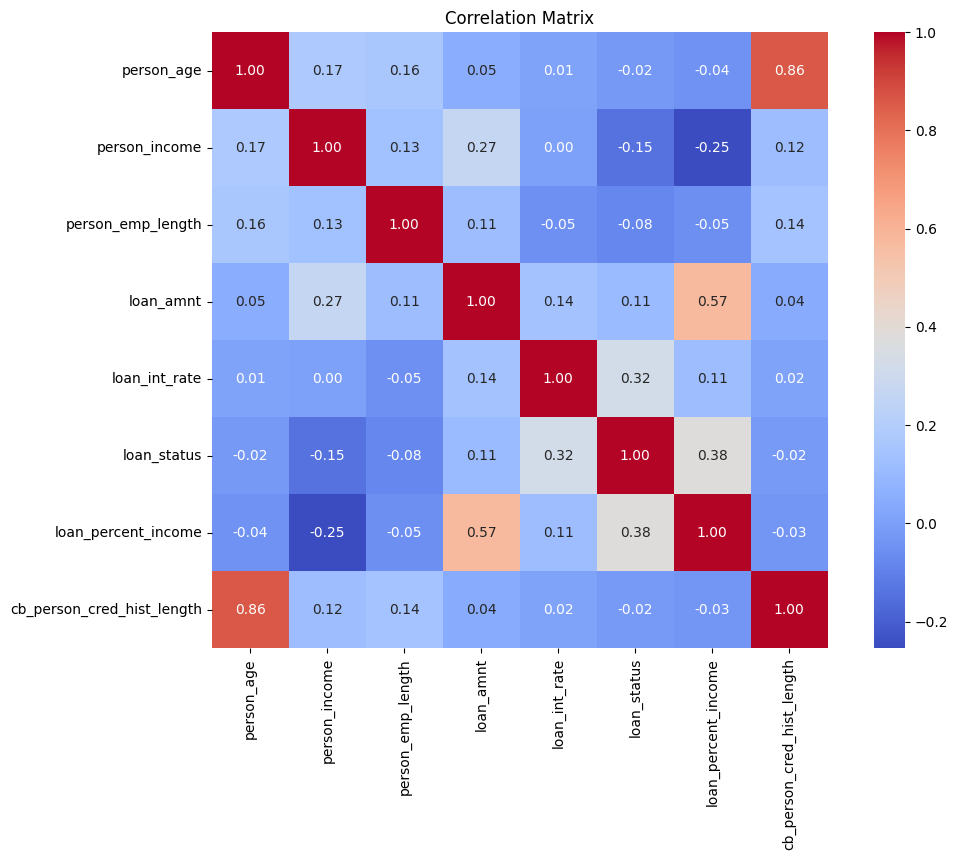

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


**Distribusi Fitur Numerik**

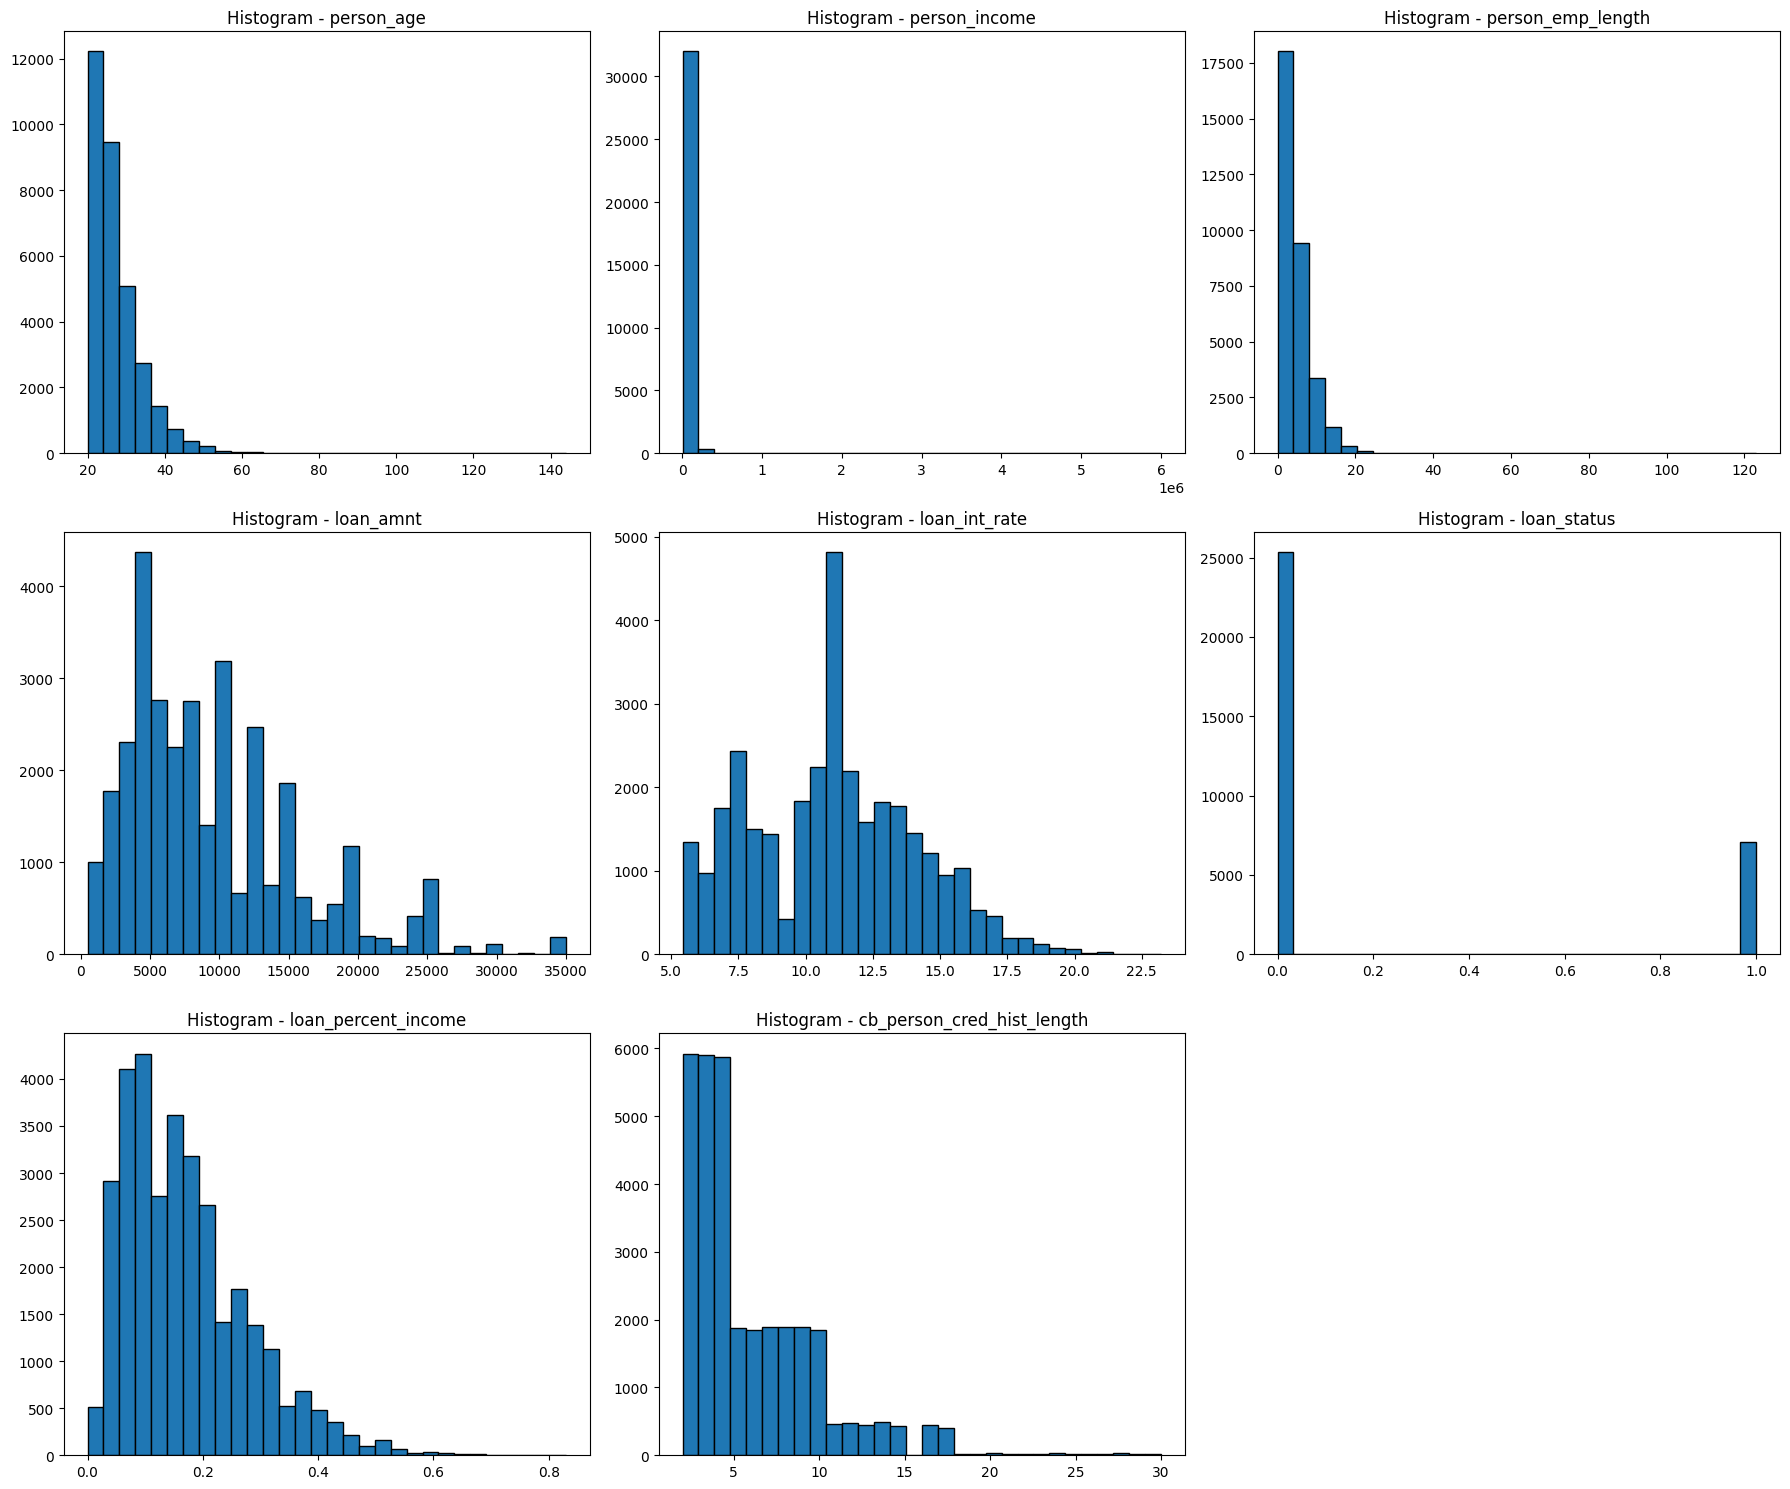

In [14]:
n = len(numerical_cols)
rows = (n + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram - {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Distribusi Fitur Kategorikal**

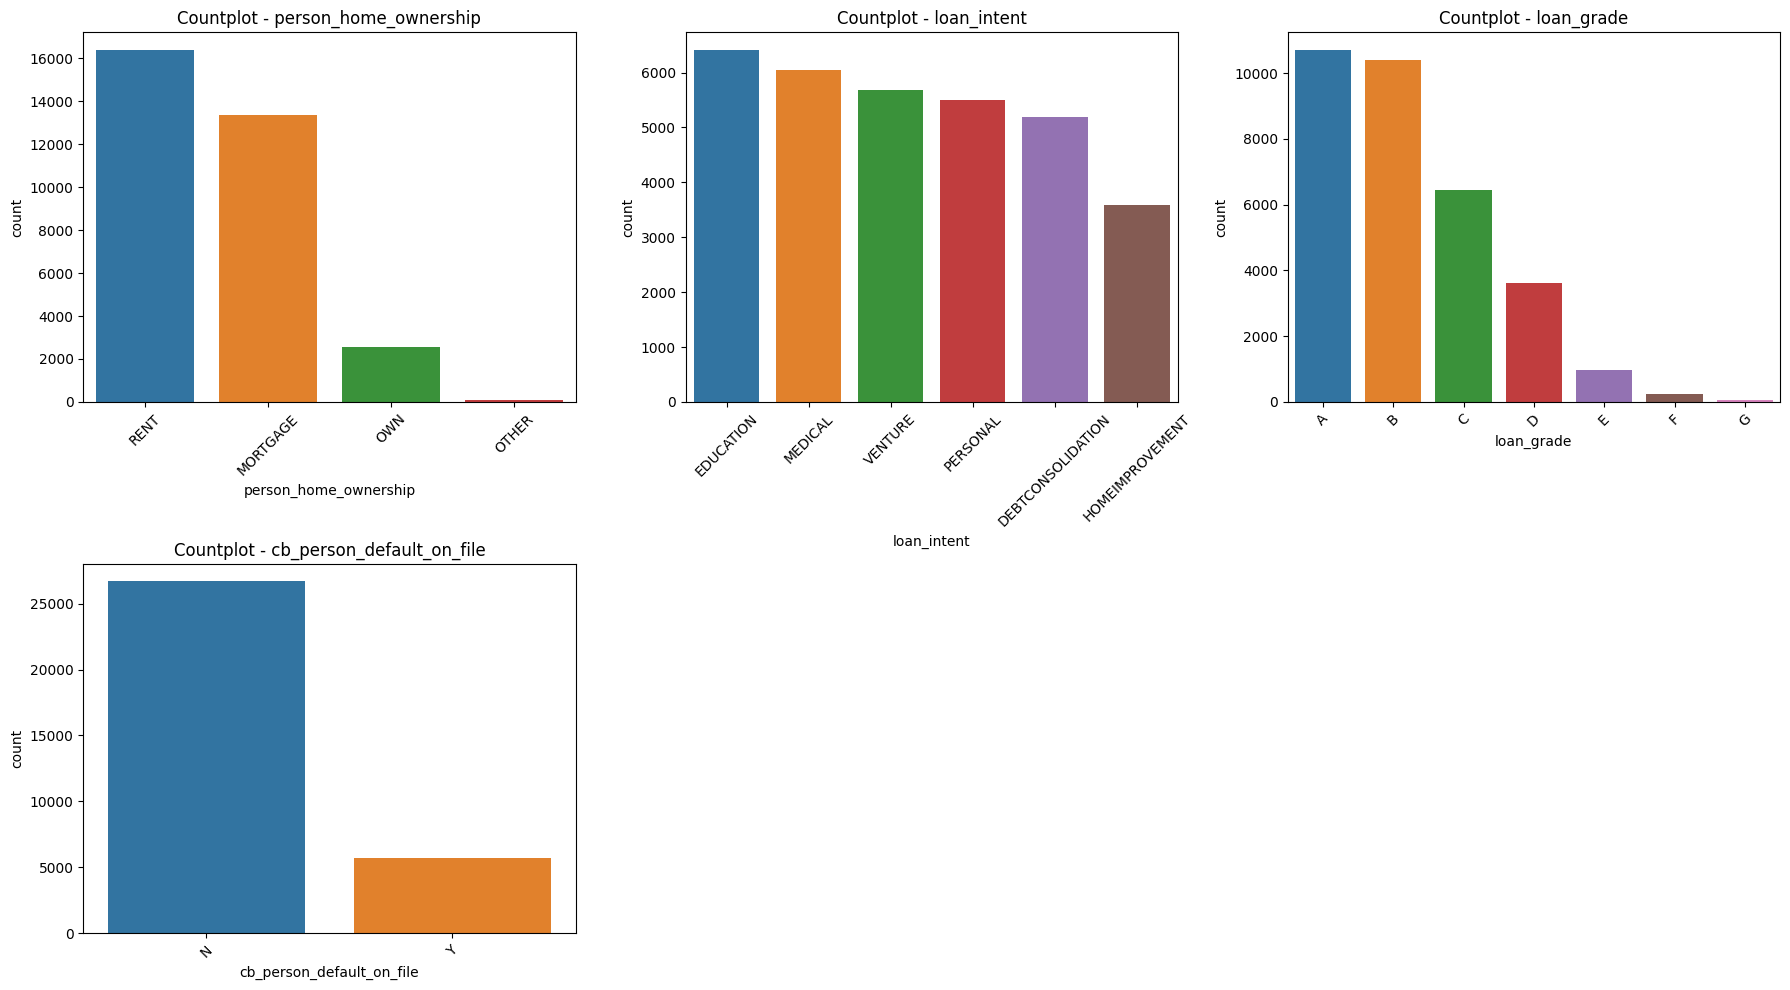

In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
n_cat = len(categorical_cols)
rows = (n_cat + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Countplot - {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Deteksi Outlier**

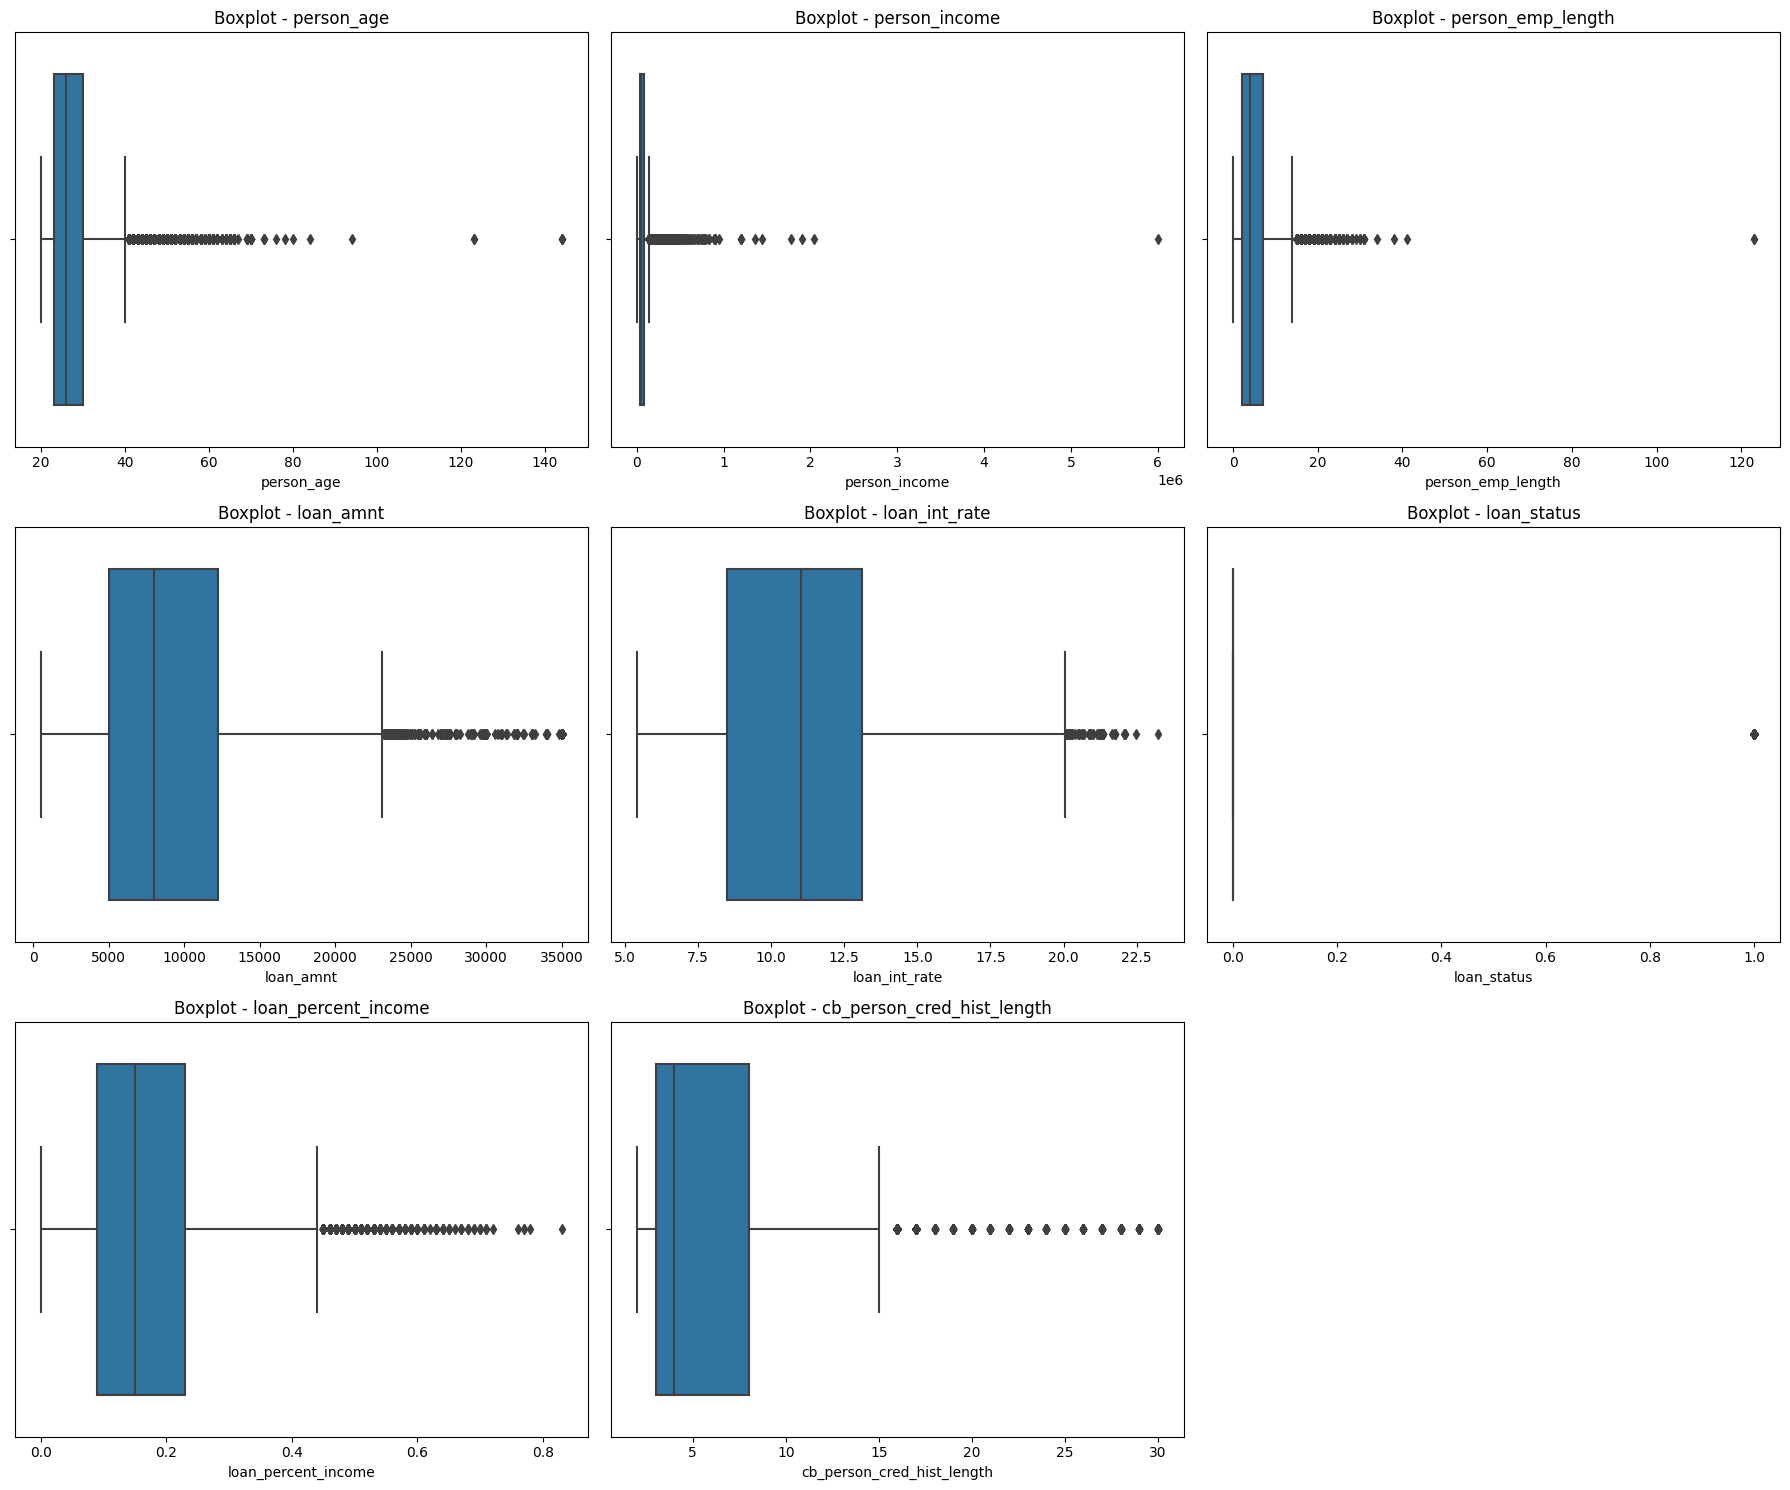

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(numerical_cols)
rows = (n + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Hubungan antar fitur numerik engan loan_status**

In [17]:
# sns.pairplot(df, hue='loan_status', diag_kind='kde')  # optional: palette='Set1'
# plt.suptitle('Pairplot antar fitur dan target', y=1.02)
# plt.show()


Jumlah masing-masing kelas:
 loan_status
0    25327
1     7089
Name: count, dtype: int64

Persentase masing-masing kelas:
 loan_status
0    78.13
1    21.87
Name: proportion, dtype: float64


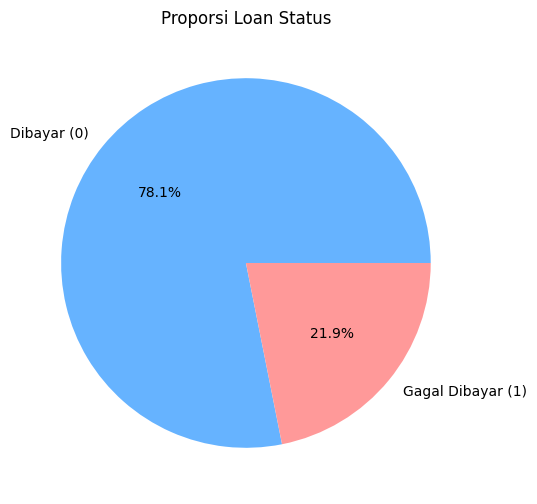

In [18]:
loan_counts = df['loan_status'].value_counts()
print("Jumlah masing-masing kelas:\n", loan_counts)

loan_percent = df['loan_status'].value_counts(normalize=True) * 100
print("\nPersentase masing-masing kelas:\n", loan_percent.round(2))

plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=['Dibayar (0)', 'Gagal Dibayar (1)'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Proporsi Loan Status')
plt.show()

**Mencari tahu apakah riwayat gagal dibayar berpengaruh dengan loan_status**

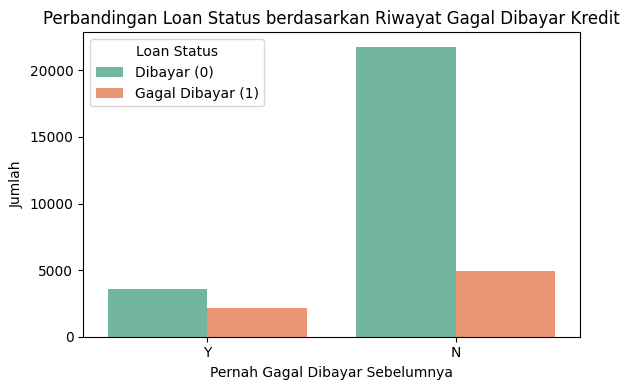

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cb_person_default_on_file', hue='loan_status', palette='Set2')

plt.title('Perbandingan Loan Status berdasarkan Riwayat Gagal Dibayar Kredit')
plt.xlabel('Pernah Gagal Dibayar Sebelumnya')
plt.ylabel('Jumlah')
plt.legend(title='Loan Status', labels=['Dibayar (0)', 'Gagal Dibayar (1)'])
plt.tight_layout()
plt.show()


## **Data Preparation**

**Menangani Outliers mengunakan IQR**

In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_outlier = df.copy()
for col in numerical_cols:
    df_outlier = remove_outliers(df, col)

In [21]:
print("Jumlah baris sebelum menghapus outlier:")
print(df.shape)
print("\n Jumlah baris setelah menghapus outlier:")
print(df_outlier.shape)

Jumlah baris sebelum menghapus outlier:
(32416, 12)

 Jumlah baris setelah menghapus outlier:
(31277, 12)


Mengecek ulang outlier menggunakan boxplot

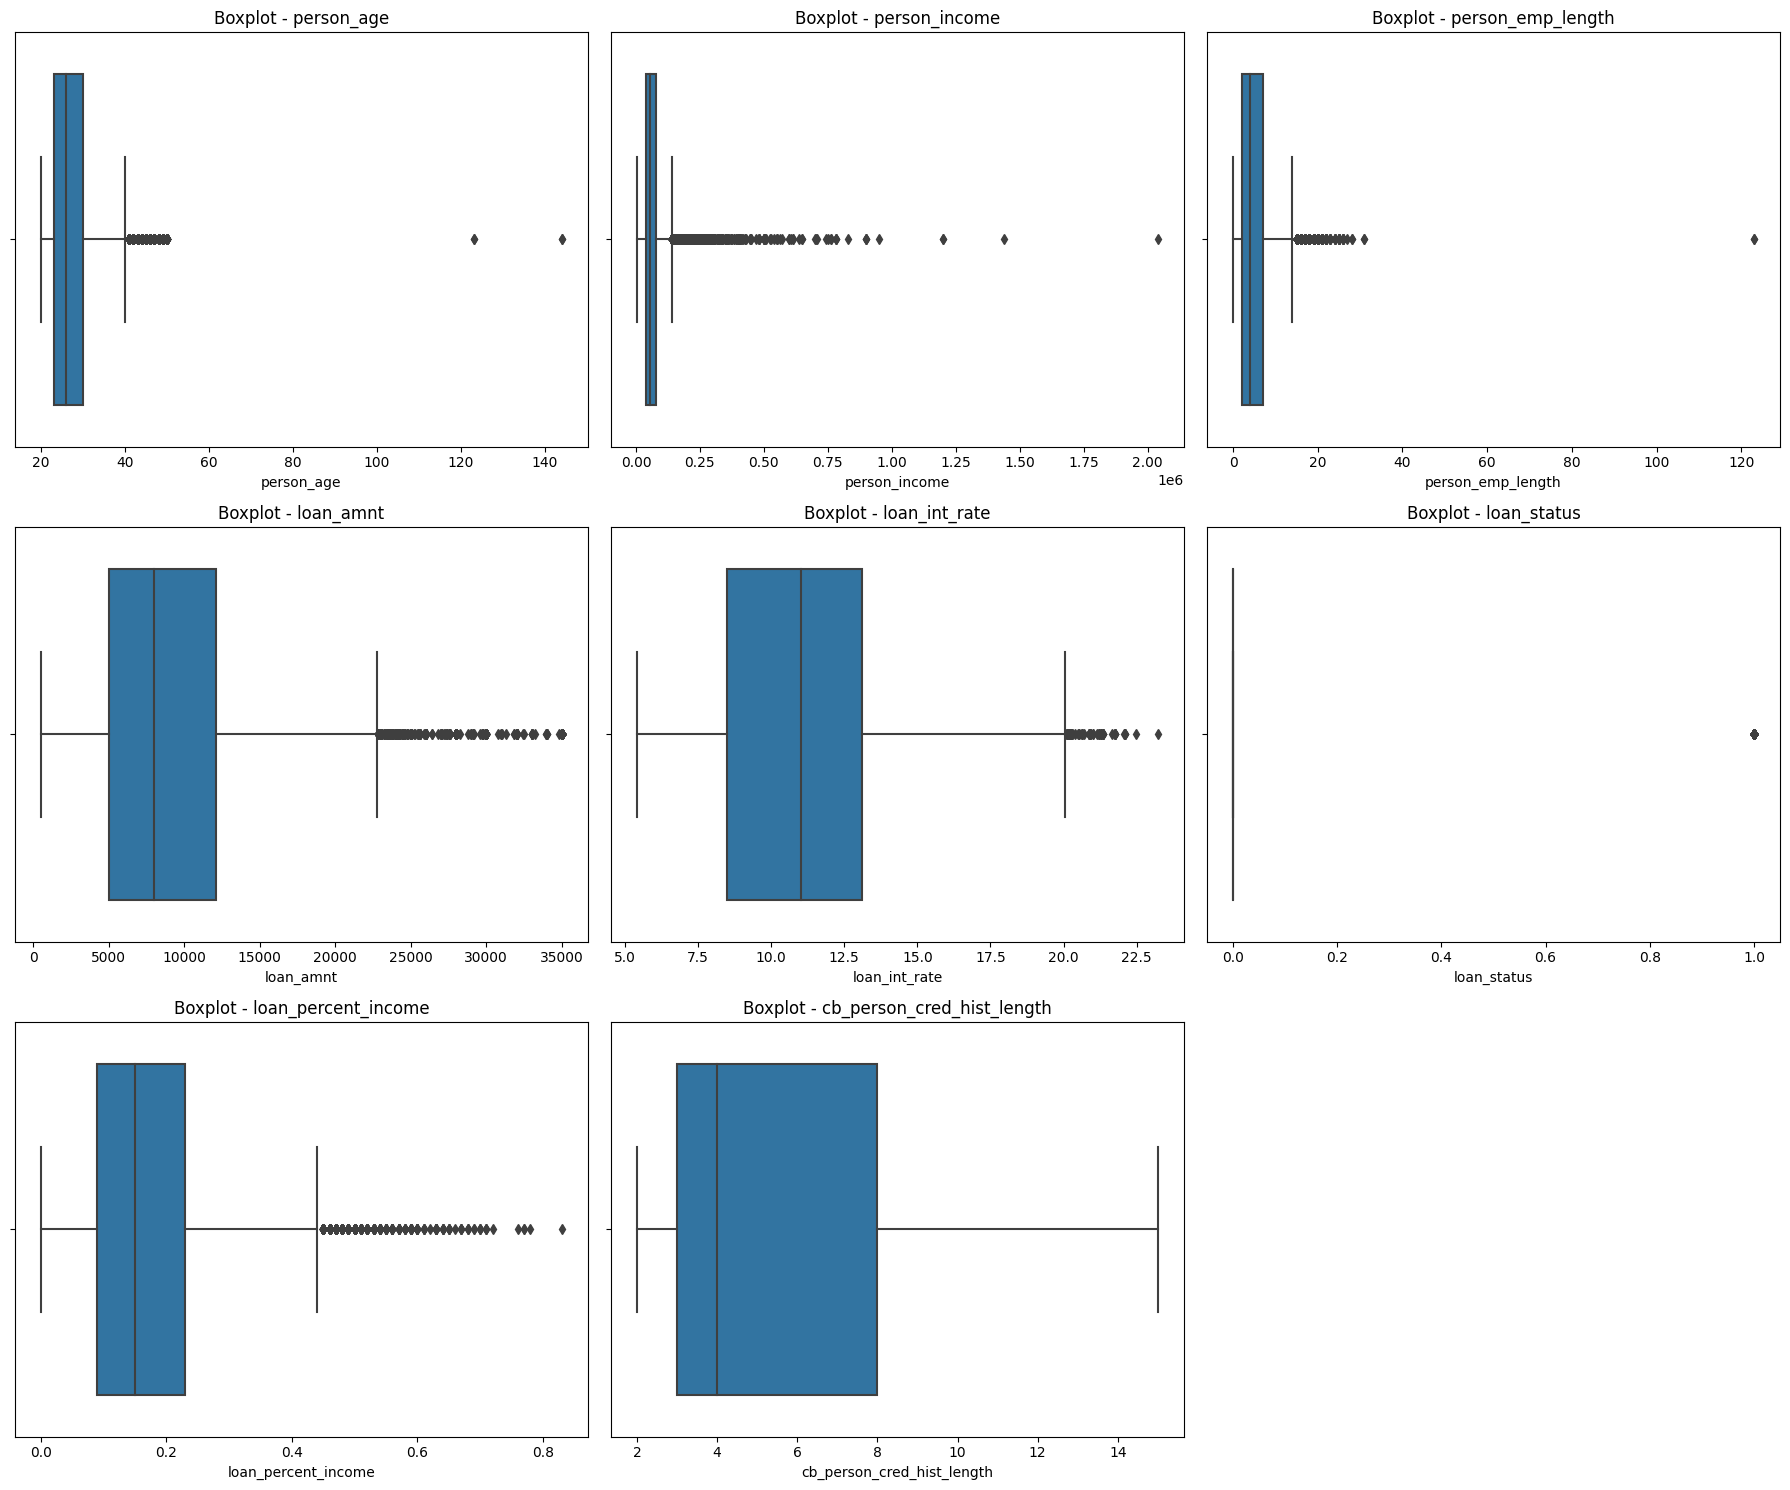

In [22]:
numerical_cols = df_outlier.select_dtypes(include=['int64', 'float64']).columns
n = len(numerical_cols)
rows = (n + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_outlier[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


karena masih ada outlier yang berkemungkinan mengganggu (seperti person_age dan person_emp_length lebih dari 100), maka kita coba hapus

In [23]:
df_outlier = df_outlier[df_outlier['person_age'] < 100]
df_outlier = df_outlier[df_outlier['person_emp_length'] < 100]

lalu cek ulang

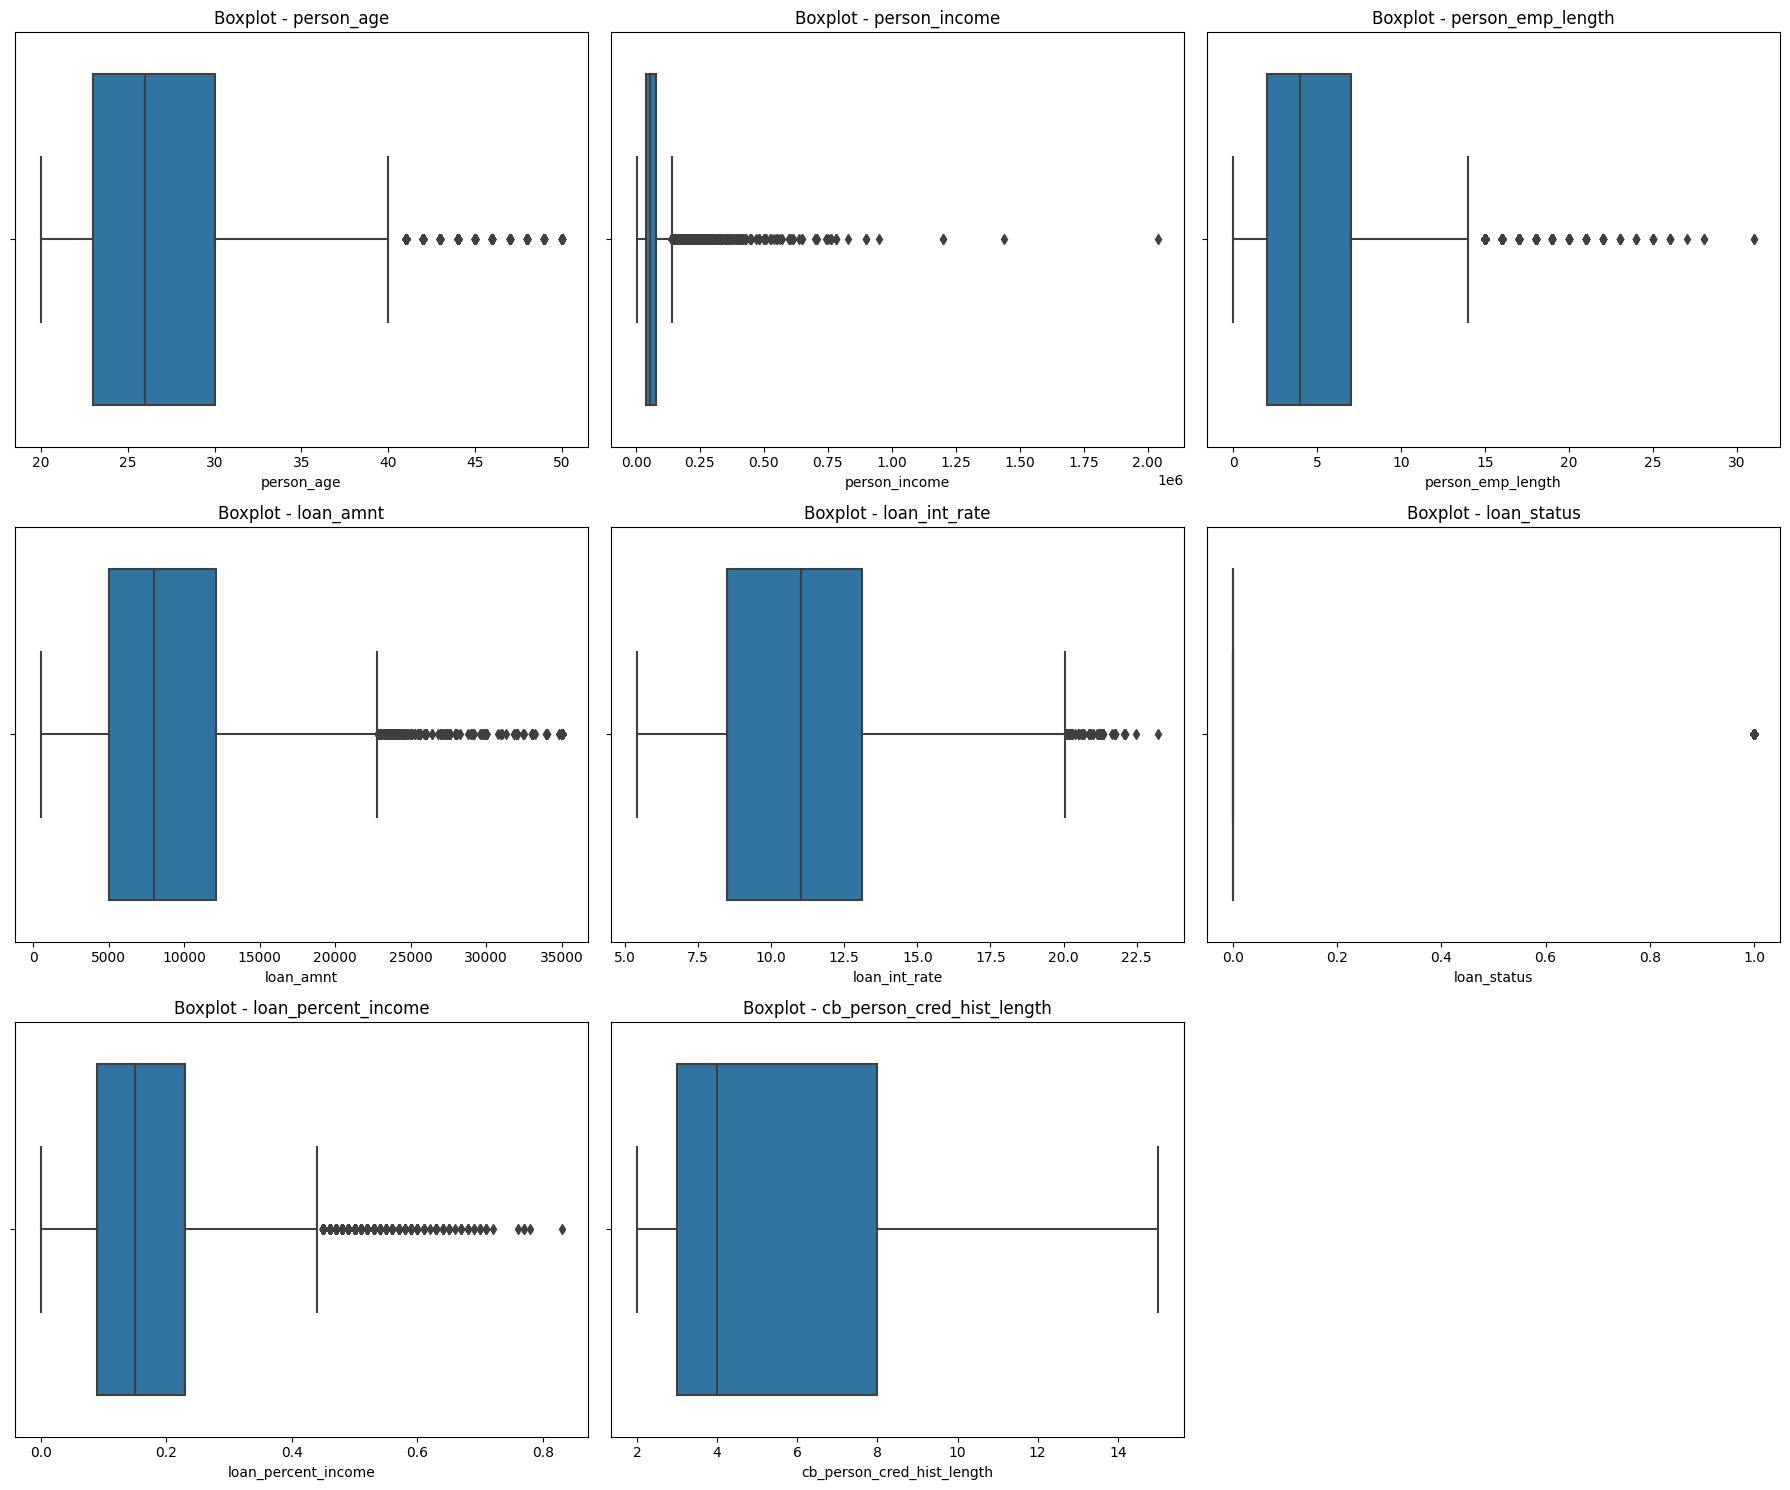

In [24]:
numerical_cols = df_outlier.select_dtypes(include=['int64', 'float64']).columns
n = len(numerical_cols)
rows = (n + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_outlier[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Data Preprocessing

**Feature Engineering**

In [25]:
data = df_outlier.copy()

Membuat fitur yang memberi indikator kemampuan membayar cicilan berdasarkan pendapatan

<ul><li>Orang dengan rasio pinjaman terhadap penghasilan yang tinggi kemungkinan lebih sulit membayar → lebih berisiko gagal bayar.</li></ul>

Contoh:

<ul> 
    <li>Orang A pinjam 10 juta dengan penghasilan 100 juta → ratio = 0.1 → ringan</li>
    <li>Orang B pinjam 10 juta dengan penghasilan 20 juta → ratio = 0.5 → berat</li>
</ul>

In [26]:
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

Membuat fitur yang mengukur stabilitas penghasilan relatif terhadap beban pinjaman


<ul>
    <li>Kombinasi antara lama kerja (stabilitas pekerjaan) dan jumlah pinjaman.
    </li>
    <li>Orang yang lama bekerja tapi pinjamannya kecil → lebih aman.
    </li>
    <li>Orang yang baru kerja tapi pinjamannya besar → lebih berisiko.
    </li>
</ul>




In [27]:
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt'] 

Membuat fitur yang memberi indikator tingkat risiko keuangan karena bunga relatif terhadap jumlah pinjaman

<ul>
    <li>Suku bunga yang tinggi sering diberikan ke peminjam berisiko.
    </li>
    <li>Tapi jika pinjaman sangat besar dan bunganya tinggi → beban cicilan lebih berat.
    </li>
    <li>Fitur ini menggabungkan tingkat bunga dan jumlah pinjaman → untuk menilai beban pembayaran.
    </li>
</ul>

In [28]:
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

**Data Encoding**

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

data_transformed = data.copy()
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    le = LabelEncoder()
    data_transformed[col] = le.fit_transform(data_transformed[col])

In [30]:
features_for_clustering = [
    'person_age',
    'person_income',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'person_emp_length',
    'cb_person_cred_hist_length',
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

**Scalling data numerikal (Standarization)**

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_transformed[features_for_clustering])

## **K-Means Clustering**

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Menurunkan dimensi data menggunakan PCA**

In [33]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

X_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_df.head()

,PCA1,PCA2
0,-0.581730,-1.992303
1,1.180226,-1.419549
2,2.635188,-0.645637
3,3.580281,0.126703
4,-1.448701,-2.302104


**Mengevaluasi jumlah cluster optimal menggunakan KMeans dan metrik inertia**

In [34]:
sil_scores = []
inertia_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    inertia_scores.append(kmeans.inertia_)

**Visualisasi elbow method untuk menentukan jumlah cluster optimal**

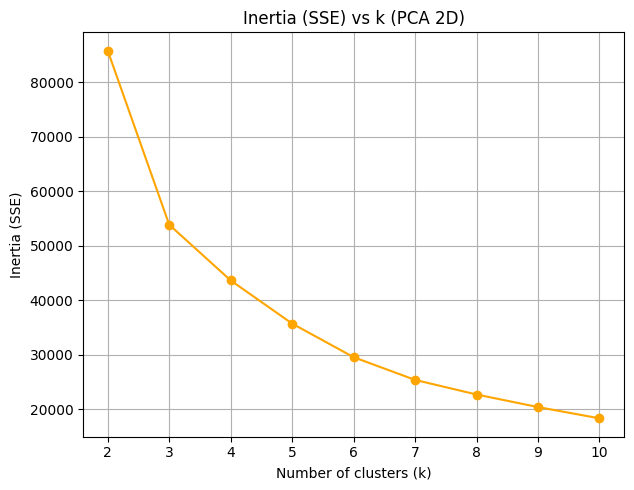

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(K_range, inertia_scores, marker='o', color='orange')
plt.title("Inertia (SSE) vs k (PCA 2D)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)

plt.tight_layout()
plt.show()

**Memilih jumlah cluster optimal berdasarkan elbow method**

In [62]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_final = kmeans_final.fit(X_pca)

**Visualisasi hasil clustering**

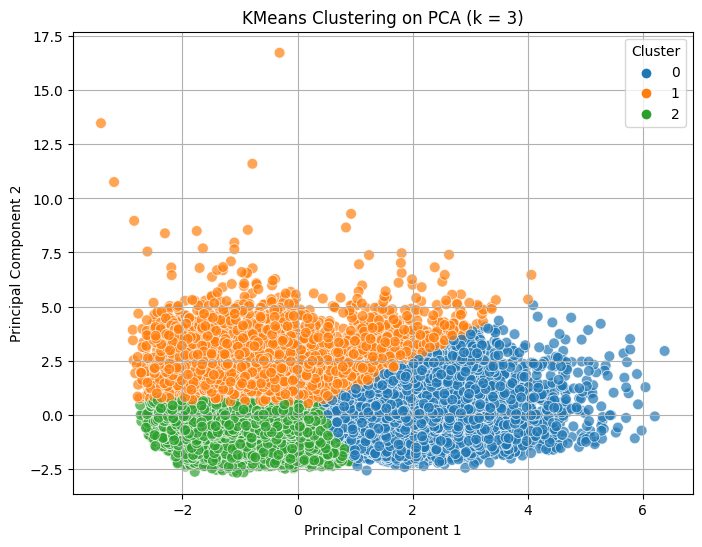

In [37]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_final

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60, alpha=0.7)
plt.title(f'KMeans Clustering on PCA (k = {optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Evaluasi hasil clustering before tuning**

In [38]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(pca_df, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.3459417097564906


**Hyperparameter tuning untuk K-Means Clustering**

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6], 
    'init': ['k-means++', 'random'], 
    'n_init': [10, 20],
    'max_iter': [100, 300, 500, 1000] 
}

kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid)

In [40]:
grid_search.fit(pca_df)

GridSearchCV(estimator=KMeans(random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 300, 500, 1000],
                         'n_clusters': [2, 3, 4, 5, 6], 'n_init': [10, 20]})

**Evaluate K-Means after tuning**

In [41]:
best_score = -1
best_params = None

In [42]:
for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(pca_df)
    score = silhouette_score((pca_df), cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

In [43]:
print("Best Parameters: ", best_params)
print("Best Silhouette Score: ", best_score)

Best Parameters:  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 10}
Best Silhouette Score:  0.4921245463184022


**Best K-Means Model**

In [44]:
best_model = KMeans(**best_params)

best_model.fit(pca_df)

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [45]:
pca_df['Cluster'] = best_model.labels_
centroids = best_model.cluster_centers_

pca_df

,PC1,PC2,Cluster
0,-0.581730,-1.992303,2
1,1.180226,-1.419549,0
2,2.635188,-0.645637,0
3,3.580281,0.126703,0
4,-1.448701,-2.302104,2
...,...,...,...
31266,-2.458098,3.529774,1
31267,-2.214129,2.977399,1
31268,-0.260215,3.417324,1
31269,-2.464863,3.652271,1


**Visualisasi CLustering menggunakan best model K-Means**

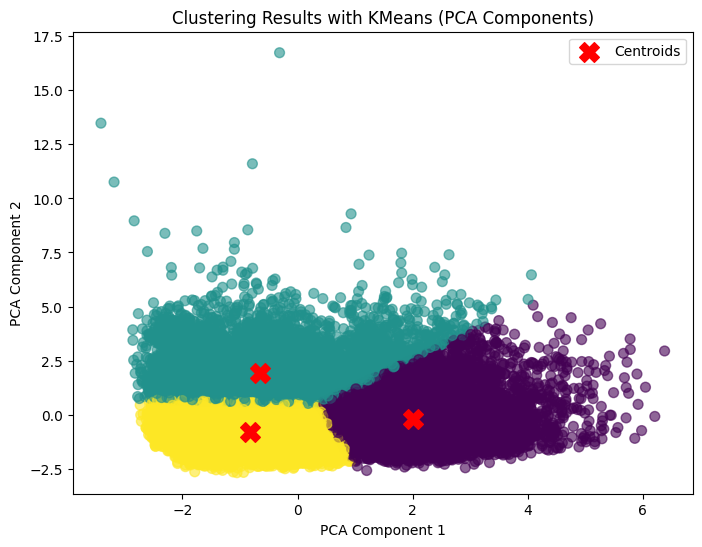

In [46]:
plt.figure(figsize=(8, 6))

plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Clustering Results with KMeans (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()

Menambahkan hasil cluster ke data asli

In [47]:
data_transformed['Cluster'] = best_model.labels_

## **Logistic Regression Modelling**

**Menyiapkan fitur dan target**

In [48]:
X = data_transformed[features_for_clustering + ['Cluster']]  # Menambahkan 'Cluster'
y = data_transformed['loan_status']

**Split data dan SMOTE untuk oversampling karena data imbalance**

In [49]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Memastikan data sudah balanced

In [50]:
from collections import Counter

print("Sebelum SMOTE:", Counter(y_train))
print("Setelah SMOTE:", Counter(y_train_resampled))

y_train_resampled.value_counts(normalize=True) * 100

Sebelum SMOTE: Counter({0: 19543, 1: 5473})
Setelah SMOTE: Counter({0: 19543, 1: 19543})


loan_status
0    50.0
1    50.0
Name: proportion, dtype: float64

**Train Model**

In [51]:
from sklearn.linear_model import LogisticRegression

# Model awal
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred = logreg.predict(X_test)

**Evaluasi Logistic Regression Before Tuning**

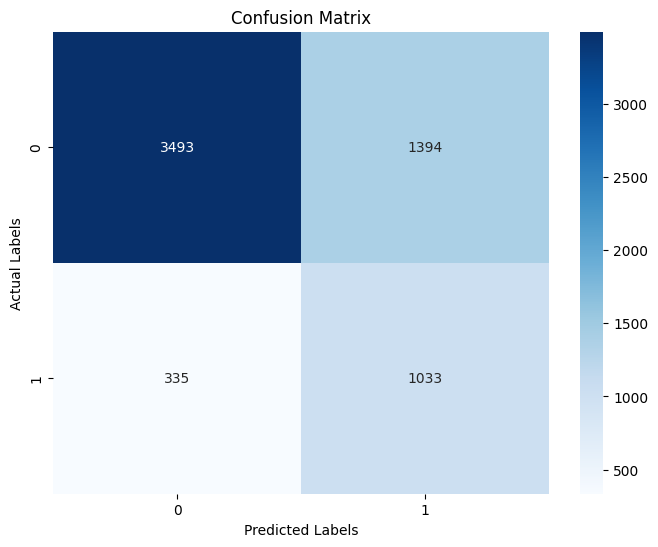


Confusion Matrix:
 [[3493 1394]
 [ 335 1033]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      4887
           1       0.43      0.76      0.54      1368

    accuracy                           0.72      6255
   macro avg       0.67      0.73      0.67      6255
weighted avg       0.81      0.72      0.75      6255

Akurasi: 0.72


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

ROC Curve

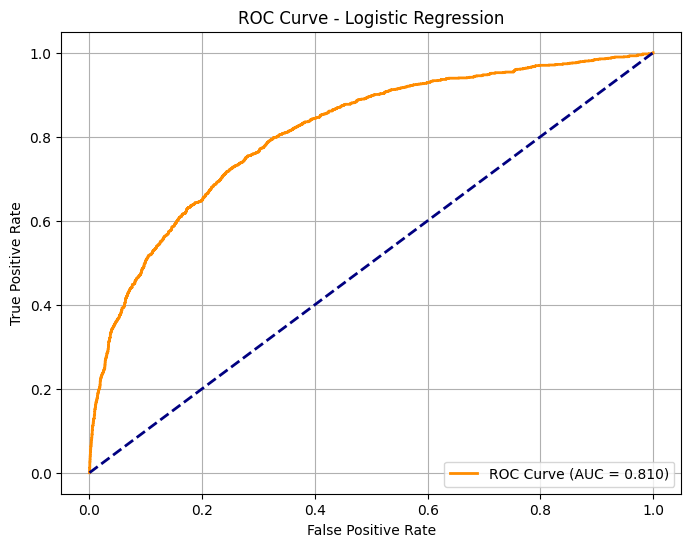

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Hyperparameter Tuning Untuk Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [55]:
best_logreg = grid.best_estimator_

y_pred_best = best_logreg.predict(X_test)

**Evaluasi Logistic Regression After Tuning**

In [56]:
print("Best Parameters:", grid.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1]))

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Akurasi: {accuracy:.2f}")

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Confusion Matrix:
 [[3493 1394]
 [ 335 1033]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      4887
           1       0.43      0.76      0.54      1368

    accuracy                           0.72      6255
   macro avg       0.67      0.73      0.67      6255
weighted avg       0.81      0.72      0.75      6255

ROC AUC Score: 0.8099638077869799
Akurasi: 0.72


In [68]:
import joblib

joblib.dump(best_logreg, 'model_logreg.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_model, 'kmeans_final.pkl')
joblib.dump(pca, 'pca.pkl')

#load model
model_loaded = joblib.load('model_logreg.pkl')
scaler_loaded = joblib.load('scaler.pkl')
kmeans_loaded = joblib.load('kmeans_final.pkl')
pca_loaded = joblib.load('pca.pkl')

print("Semua model berhasil disimpan dan di-load!")

In [ ]:
!ngrok config add_authtoken ****

NAME:
  config - update or migrate ngrok's configuration file

USAGE:
  ngrok config [flags]

DESCRIPTION: 
  The config command gives a quick way to create or update ngrok's configuration
  file. Use 'add-authtoken' or 'add-api-key' to set the corresponding properties.

  Use 'check' to test a configuration file for validity. If you have an old
  configuration file, you can also use 'upgrade' to automatically migrate to the
  latest version.

COMMANDS:
  add-api-key                    save api key to configuration file
  add-authtoken                  save authtoken to configuration file
  add-connect-url                adds the connect URL (connect_url) to configuration file for custom agent ingress
  add-server-addr                alias of add-connect-url
  check                          check configuration file
  edit                           edit configuration file
  upgrade                        auto-upgrade configuration file

OPTIONS:
      --config strings   path to config f

In [60]:
from pyngrok import ngrok
import threading
import time
import os

In [71]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


t=2025-06-15T15:27:25+0700 lvl=eror msg="unable to evaluate ngrok agent binary path for symlinks" obj=tunnels.session err="CreateFile C:\\Users\\andra\\AppData\\Local\\ngrok\\ngrok.exe: The system cannot find the file specified."
t=2025-06-15T15:27:25+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified is properly formed, but it is invalid.\nYour authtoken: 2ww70XDxuorncQbcmrHG4xnkTeV_6cpMSvAnhLomyU8HzqYDX\nThis usually happens when:\n    - You reset your authtoken\n    - Your authtoken was for a team account that you were removed from\n    - You are using ngrok link and this credential was explicitly revoked\nGo to your ngrok dashboard and double check that your authtoken is correct:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_107\r\n"
t=2025-06-15T15:27:25+0700 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified is properly formed

PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified is properly formed, but it is invalid.\nYour authtoken: 2ww70XDxuorncQbcmrHG4xnkTeV_6cpMSvAnhLomyU8HzqYDX\nThis usually happens when:\n    - You reset your authtoken\n    - Your authtoken was for a team account that you were removed from\n    - You are using ngrok link and this credential was explicitly revoked\nGo to your ngrok dashboard and double check that your authtoken is correct:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_107\r\n.